In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pybullet

import time
plt.ion()
img = np.random.rand(200, 320)

#img = [tandard_normal((50,100))

image = plt.imshow(img,interpolation='none',animated=True,label="blah")

ax = plt.gca()
#pybullet.connect(pybullet.GUI)

#pybullet.connect(pybullet.DIRECT)
pybullet.connect(pybullet.SHARED_MEMORY)


pybullet.loadURDF("plane.urdf",[0,0,-1])

#pybullet.loadURDF("r2d2.urdf")
pybullet.loadURDF("D:/bullet3_vr/examples/pybullet/gym/pybullet_data/baxter_common/baxter_description/urdf/toms_baxter.urdf")


camTargetPos = [0,0,0]

cameraUp = [0,0,1]

cameraPos = [1,1,1]

pybullet.setGravity(0,0,-10)



pitch = -10.0



roll=0

upAxisIndex = 2

camDistance = 4

pixelWidth = 120

pixelHeight = 120

nearPlane = 0.01

farPlane = 100

fov = 60


In [2]:
yaw = 10
viewMatrix = pybullet.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)
aspect = pixelWidth / pixelHeight;

projectionMatrix = pybullet.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane);

In [3]:
img_arr = pybullet.getCameraImage(pixelWidth, pixelHeight,
   viewMatrix,projectionMatrix, renderer=pybullet.ER_BULLET_HARDWARE_OPENGL)
#shadow=1,lightDirection=[1,1,1],ER_TINY_RENDERER  ER_BULLET_HARDWARE_OPENGL

120


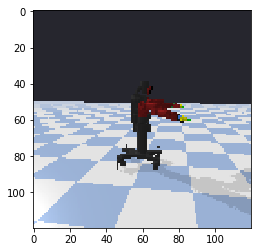

In [4]:
w=img_arr[0] #width of the image, in pixels
h = img_arr[1]
print(w)
rgb=img_arr[2] #color data RGB
np_img_arr = np.reshape(rgb, (h, w, 4))
np_img_arr = np_img_arr*(1./255.)

depth_buffer_opengl = np.reshape(img_arr[3], [w, h])

depth_opengl = farPlane * nearPlane / (farPlane - (farPlane - nearPlane) * depth_buffer_opengl)

seg_opengl = np.reshape(img_arr[4], [w, h])*1./255.

image = plt.imshow(np_img_arr,interpolation='none',animated=True,label="blah")



image.set_data(np_img_arr)

ax.plot([0])

    #plt.draw()

plt.show()

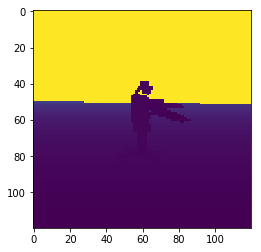

In [5]:
image_depth = plt.imshow(depth_opengl,interpolation='none',animated=True,label="blah")

image_depth.set_data(depth_opengl)

ax.plot([0])

    #plt.draw()

plt.show()

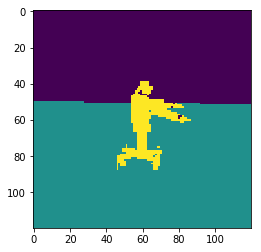

In [6]:
image_seg= plt.imshow(seg_opengl,interpolation='none',animated=True,label="blah")
image_seg.set_data(seg_opengl)

ax.plot([0])

    #plt.draw()

plt.show()

renderImage 0.054854
width = 120 height = 120


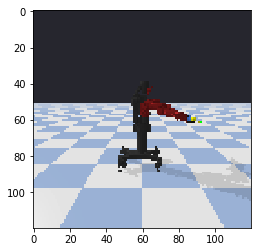

renderImage 0.058844
width = 120 height = 120


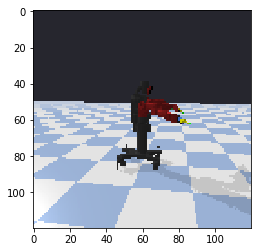

renderImage 0.050864
width = 120 height = 120


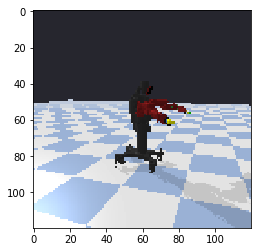

renderImage 0.073800
width = 120 height = 120


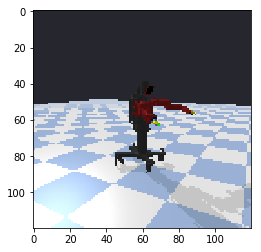

renderImage 0.038895
width = 120 height = 120


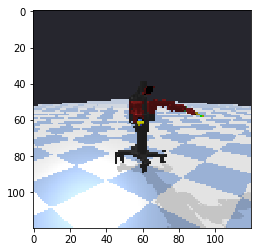

renderImage 0.086283
width = 120 height = 120


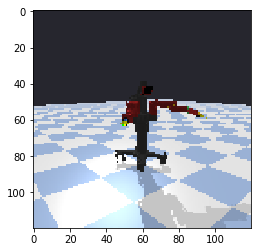

renderImage 0.035910
width = 120 height = 120


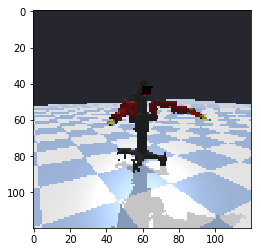

renderImage 0.060837
width = 120 height = 120


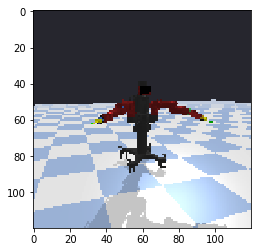

renderImage 0.072804
width = 120 height = 120


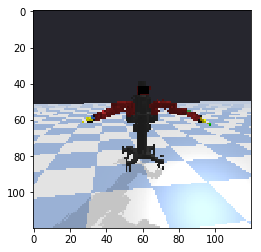

renderImage 0.029922
width = 120 height = 120


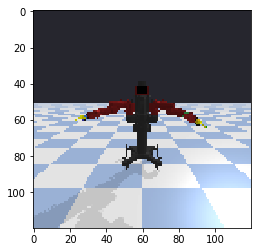

renderImage 0.074801
width = 120 height = 120


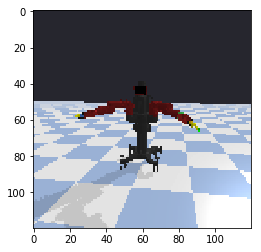

renderImage 0.094775
width = 120 height = 120


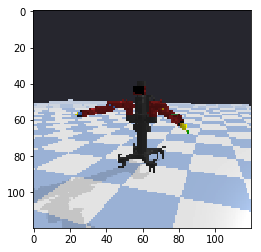

renderImage 0.048870
width = 120 height = 120


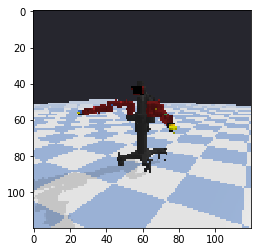

renderImage 0.029915
width = 120 height = 120


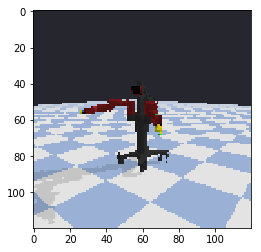

renderImage 0.058841
width = 120 height = 120


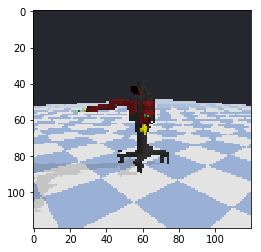

renderImage 0.039881
width = 120 height = 120


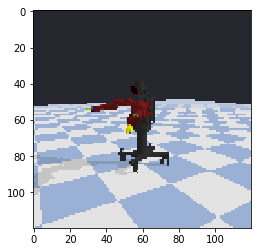

renderImage 0.105716
width = 120 height = 120


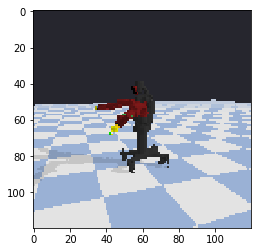

renderImage 0.144612
width = 120 height = 120


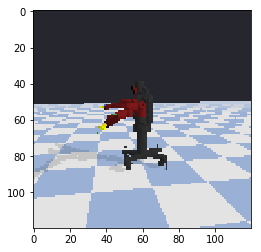

renderImage 0.076794
width = 120 height = 120


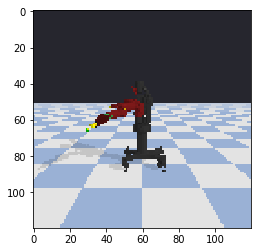

renderImage 0.117685
width = 120 height = 120


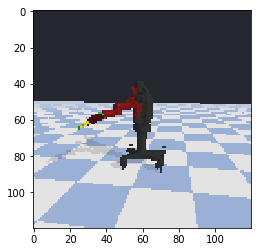

renderImage 0.076794
width = 120 height = 120


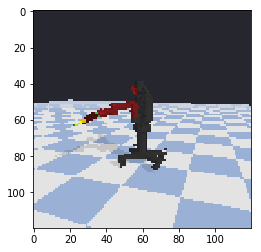

renderImage 0.096724
width = 120 height = 120


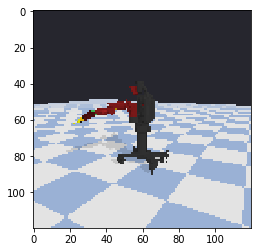

renderImage 0.085771
width = 120 height = 120


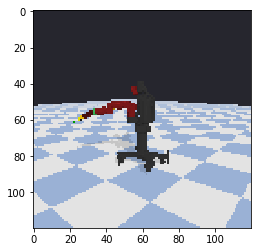

renderImage 0.076794
width = 120 height = 120


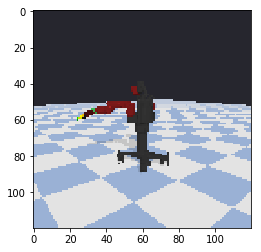

renderImage 0.127170
width = 120 height = 120


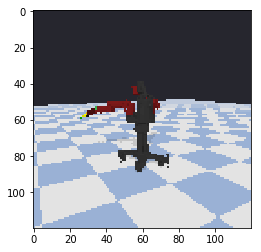

renderImage 0.068924
width = 120 height = 120


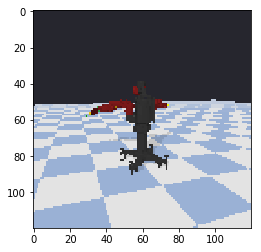

renderImage 0.094747
width = 120 height = 120


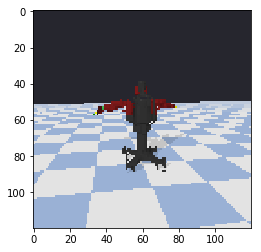

renderImage 0.052859
width = 120 height = 120


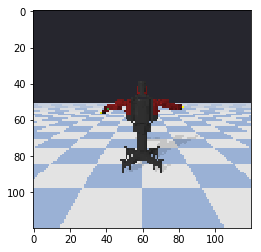

renderImage 0.098245
width = 120 height = 120


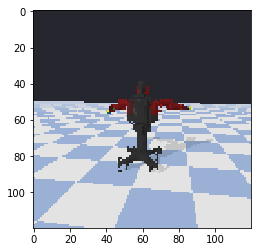

renderImage 0.039376
width = 120 height = 120


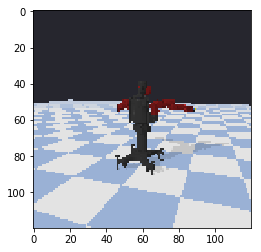

renderImage 0.079784
width = 120 height = 120


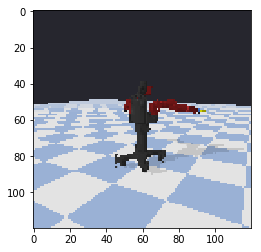

renderImage 0.063828
width = 120 height = 120


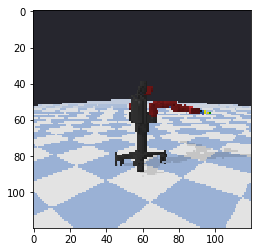

renderImage 0.105717
width = 120 height = 120


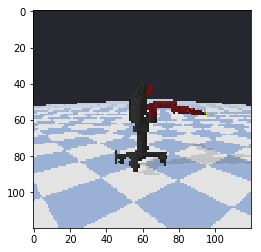

renderImage 0.085967
width = 120 height = 120


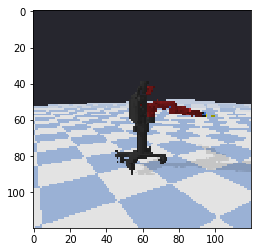

renderImage 0.077783
width = 120 height = 120


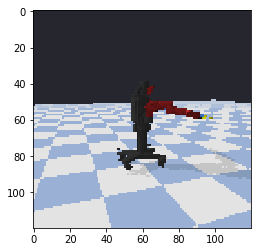

renderImage 0.088762
width = 120 height = 120


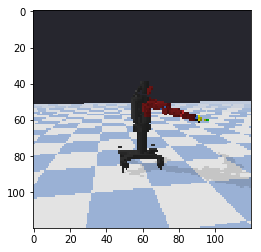

Total time 14.509606


In [7]:
main_start = time.time()
t=1
#logId = pybullet.startStateLogging(pybullet.STATE_LOGGING_VIDEO_MP4,"vidoelog")
while (t<10):

  for yaw in range (0,360,10):

    pybullet.stepSimulation()

    start = time.time()

    t=t+1

    viewMatrix = pybullet.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)

    aspect = pixelWidth / pixelHeight;

    projectionMatrix = pybullet.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane);

    img_arr = pybullet.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1,lightDirection=[1,1,1],renderer=pybullet.ER_BULLET_HARDWARE_OPENGL)

    stop = time.time()

    print ("renderImage %f" % (stop - start))



    w=img_arr[0] #width of the image, in pixels

    h=img_arr[1] #height of the image, in pixels

    rgb=img_arr[2] #color data RGB

    dep=img_arr[3] #depth data



    print ('width = %d height = %d' % (w,h))



    #note that sending the data to matplotlib is really slow



    #reshape is needed

    np_img_arr = np.reshape(rgb, (h, w, 4))

    np_img_arr = np_img_arr*(1./255.)

    

    #show

    #plt.imshow(np_img_arr,interpolation='none',extent=(0,1600,0,1200))

    image = plt.imshow(np_img_arr,interpolation='none',animated=True,label="blah")



    image.set_data(np_img_arr)

    ax.plot([0])

    #plt.draw()

    plt.show()

    plt.pause(0.01)

    #image.draw()

    



main_stop = time.time()



print ("Total time %f" % (main_stop - main_start))

#pybullet.stopStateLogging(logId)

#pybullet.resetSimulation()